<a href="https://colab.research.google.com/github/Nim-ah/MIE1624-Course-Project/blob/main/Copy_of_1624_Sentiment_Analysis_sharpay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Some incorporated code and references:
https://www.kaggle.com/code/hansamaheshwari/twitter-sentiment-analysis-lr-hansa


# Part 1
## Data Pre-Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIE1624 Data science and analytics/MIE1624-Course-Project-main/sentiment_analysis.csv')
df.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


For part 2 you will need to load the text pre-processing code from here 


In [ ]:
# Lower case all the text
def lowercase(tweet):
    return tweet.lower()

#Remove tags
def remove_tags(tweet):
    return re.sub("@[A-Za-z0-9_]+", '', str(tweet))

#Remove mentions
def remove_mentions(tweet):
    return re.sub("#[A-Za-z0-9_]+", '', str(tweet))

# Remove all URLs
def remove_url(tweet):
    urls = re.compile(r'\s*(?:https?:\/\/)?[\w.-]+(?:\.[\w.-]+)+[\w\-._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+')
    return re.sub(urls, ' ', str(tweet))

#Token nize the string
def tokenize(tweet):
    tok_tweet = nltk.tokenize.word_tokenize(tweet)
    return ' '.join(tok_tweet)

#Remove rt in front of the string if starts with rt is detected
def remove_rt (tweet):
    x = re.search("^rt",tweet)
    if x:
        temp = re.sub("rt", '', str(tweet))
    else:
        temp = tweet
    return temp

#Remove stopwords
def remove_stopwords(tweet):
    words = tweet.split()
    clean_tweet = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(clean_tweet)

#remove non alphabatical numbers
def remove_nonAlphaNum(tweet):
    return re.sub(r'[^\s\w]+', '', tweet)

In [ ]:


def clean(tweet):
    tweet = lowercase(tweet) 
    tweet = remove_tags(tweet)
    tweet = remove_mentions(tweet)
    tweet = remove_url(tweet)
    tweet = tokenize(tweet)
    tweet = remove_rt(tweet)
    tweet = remove_stopwords(tweet)
    tweet = remove_nonAlphaNum(tweet)
    return tweet


And stop here

In [ ]:
#Treat the raw string
df['Cleaned'] = df['text'].apply(clean)

#Delete ID column as it is not relevant
df.drop('ID',axis = 1)

KeyboardInterrupt: ignored

The cleaned csv file can be found here:https://utoronto-my.sharepoint.com/:x:/g/personal/yew_wang_mail_utoronto_ca/EdUeyO2A3alKlxrj8RxRMvMBqZKkc1bv6cghXCc68Jtwdg?e=uYOgCA

In [ ]:
#Save cleaned dataset to csv and load in later step to save processing time
#df.to_csv('/cleaned_sentiment_analysis.csv', index=False)
cleaned_df = pd.read_csv('cleaned_sentiment_analysis.csv')

In [ ]:
cleaned_df.dropna(inplace=True)

In [ ]:
cleaned_df

,ID,text,label,Cleaned
0,768098000000000000,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward tab breeders crow...
1,768098000000000000,RT @MianUsmanJaved: Congratulations Pakistan o...,1,congratulations pakistan becoming world odds
2,768098000000000000,"RT @PEPalerts: This September, @YESmag is taki...",1,september taking maine mendoza surprise tha...
3,768098000000000000,"RT @david_gaibis: Newly painted walls, thanks ...",1,newly painted walls thanks million custodial...
4,768098000000000000,RT @CedricFeschotte: Excited to announce: as o...,1,excited announce july 2017 feschotte lab rel...
...,...,...,...,...
550386,804617000000000000,@goddesses_o I can't stop watching her...mm. M...,0,ca nt stop watching
550387,804618000000000000,Poor old Tom Odell doesn't look like he would ...,0,poor old tom odell nt look like would know wro...
550388,804618000000000000,#antsmasher I smashed 7 ants in this awesome ...,1,smashed 7 ants awesome game hjfjfi
550389,804618000000000000,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1,morning girls wonderful


In [ ]:
cleaned_df['Cleaned'].dtype()

In [ ]:
#Split the dataset into train-test and apply the TFIDF vectorization on training dataset
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['Cleaned'], cleaned_df['label'], test_size=0.3, random_state=42)
# apply tf-idf and get the top 200 features
tfidf = TfidfVectorizer(lowercase=True, max_features = 200)
X_train_idf = tfidf.fit_transform(X_train) # only fit the training data    
X_test_idf = tfidf.transform(X_test)

In [ ]:
X_train_idf = pd.DataFrame(X_train_idf.todense(), columns = tfidf.get_feature_names_out())
X_test_idf = pd.DataFrame(X_test_idf.todense(), columns = tfidf.get_feature_names_out())
X_train_idf.head(5)

In [ ]:
def plot_roc_curve(y_true, y_score):
    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    
    # Compute area under the ROC curve
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

In [ ]:
clf = LogisticRegression().fit(X_train_idf, y_train)
# predict on train and test set
y_train_predict = clf.predict(X_train_idf)
y_test_predict = clf.predict(X_test_idf)
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

In [ ]:
print(train_accuracy, test_accuracy)

With gridsearchCV and Cross-Validation

In [ ]:
#All the gridsearch cells should only be run once
'''
parameters = {'C':[0.01, 0.1, 1, 10, 100], 
              'solver':('liblinear','lbfgs', 'newton-cg'),
              'penalty':('none',  'l2')}

model = LogisticRegression()
cv = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
cv.fit(X_train_idf, y_train)

print('Best cross-validation score is :\n',cv.best_score_)
print('Best parameter:\n', cv.best_params_)
'''

In [ ]:
# {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'} was determined to be the best hyperparameter set
bestLOGmodel = LogisticRegression(C = 10, penalty= 'l2', solver = 'newton-cg')
bestLOGmodel.fit(X_train_idf, y_train)
y_pred_LOG = bestLOGmodel.predict(X_test_idf)
LOG_f1 = f1_score(y_test, y_pred_LOG)
LOG_acc = accuracy_score(y_test, y_pred_LOG)
print("F1 Score Logistic Regression:",LOG_f1)
print("Accuracy Score Logistic Regression:",LOG_acc)

In [ ]:
y_test_prob_LOG = bestLOGmodel.predict_proba(X_test_idf)
plot_roc_curve(y_test, y_test_prob_LOG[:, 1])

## Naive Bayes

In [ ]:
clf = BernoulliNB().fit(X_train_idf, y_train)
# predict on train and test set
y_train_predict = clf.predict(X_train_idf)
y_test_predict = clf.predict(X_test_idf)
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)
test_f1 = f1_score(y_test, y_test_predict)
print("F1 Score NB:",test_f1)
print("Accuracy Score NB:",test_accuracy)

In [ ]:
y_test_prob_NB = clf.predict_proba(X_test_idf)
plot_roc_curve(y_test, y_test_prob_NB[:, 1])

### SVM

With gridsearchCV and Cross-Validation

In [ ]:
#All the gridsearch cells should only be run once
'''
parameters = {'C':[0.001, 0.01, 0.1, 1, 10]}
model = LinearSVC(random_state=0, tol=1e-5)
cv = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
cv.fit(X_train_idf, y_train)

print('The best cross-validation score: ',cv.best_score_)
print('The best parameter:', cv.best_params_)
'''

In [ ]:
#C = 1 was the best hyper parameter
bestSVMmodel = LinearSVC(random_state=0, tol=1e-5, C = 1)
bestSVMmodel.fit(X_train_idf, y_train)
y_pred_SVM = bestSVMmodel.predict(X_test_idf)
SVM_f1 = f1_score(y_test, y_pred_SVM)
SVM_acc = accuracy_score(y_test, y_pred_SVM)
print("F1 Score SVM:",SVM_f1)
print("Accuracy Score SVM:",SVM_acc)


In [ ]:
y_test_prob_SVM = bestSVMmodel._predict_proba_lr(X_test_idf)
plot_roc_curve(y_test, y_test_prob_SVM[:, 1])

### Random Forest

In [ ]:
'''
parameters = {'min_samples_split':[ 10, 15, 20],
              'n_estimators':[50, 100, 200]}

model = RandomForestClassifier( random_state=0)
cv = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
cv.fit(X_train_idf, y_train)

print('The best cross-validation score: ',cv.best_score_)
print('The best parameter:', cv.best_params_)
'''

Get accuracy and f1 socre on test set

In [ ]:
#Using min sample split = 20 and n estimators = 200
bestRFmodel = RandomForestClassifier(min_samples_split = 20, n_estimators= 200, random_state=0)
bestRFmodel.fit(X_train_idf, y_train)
y_pred_RF = bestRFmodel.predict(X_test_idf)
RF_f1 = f1_score(y_test, y_pred_RF)
RF_acc = accuracy_score(y_test, y_pred_RF)
print("F1 Score Random Forest:",RF_f1)
print("Accuracy Score Random Forest:",RF_acc)


In [ ]:
y_test_prob_RF = bestRFmodel.predict_proba(X_test_idf)
plot_roc_curve(y_test, y_test_prob_RF[:, 1])

Result Summary for part1

In [ ]:
model_list = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
f1_list = [LOG_f1, test_f1, SVM_f1, RF_f1]
acc_list = [LOG_acc, test_accuracy,SVM_acc, RF_acc]


In [ ]:
result_df = pd.DataFrame({
    'Model': model_list,
    'F1 Score': f1_list,
    'Accuracy': acc_list
})
result_df

Based on F1 socre, Random Forest model with min_sample_split = 20, and 200 n_estimators performed the best, this model will be used in part 2.

# Part 2

In this part, our group will use newsAPI to collect the descriptions of news articles involve keywords: "russia", "ukraine", and "war". Then use the trained model from part 1 to perform Sentiment_Analysis on news descriptions to evaluate if it will be labeled as positive or negative.

In [ ]:
!pip install newsapi-python
import pandas as pd
from newsapi import NewsApiClient
from collections import Counter
import datetime

*To save the api usage, the following cell should **only** be called when the sources or date needs to be modified. *

In [ ]:
# Initialize NewsAPI client
newsapi = NewsApiClient(api_key='4678da4b69ee46599f1280355d700b2e')

# Set query parameters
query = 'russia AND ukraine AND war' #keywords
language = 'en'
today = datetime.date.today()
from_date = (today - datetime.timedelta(days=25)).isoformat()

aggregated_list = []
list_of_news_sources = ['bbc-news','the-verge', 'abc-news','associated-press', 'bloomberg', 'business-insider', 'cbs-news', 'cnn',
                        'fortune','fox-news','google-news','msnbc','politico', 'reuters','the-wall-street-journal','the-washington-post','time','usa-today','wired']
# Retrieve articles
for src in list_of_news_sources:
  articles = newsapi.get_everything(q=query,
                                    sources=src,
                                    language=language,
                                    from_param=from_date,
                                    sort_by='relevancy')

  # Extract description text from articles
  descriptions = [article['description'] for article in articles['articles']]
  aggregated_list.extend(descriptions)

news_df = pd.DataFrame({
    'description': aggregated_list,

})
news_df['description'] = news_df['description'].astype(str)
news_df


The pre-processed news data should be loaded here in this step:

In [ ]:
#news_df.to_csv('/news_description.csv', index=False)
news_df = pd.read_csv('news_description.csv')

In [ ]:
news_df

,description
0,The Russian ambassador said he wanted the UN t...
1,Steve Rosenberg looks at why Vladimir Putin se...
2,Both Ukraine and Russia have reported inflicti...
3,Russia and China refused to condemn Moscow's i...
4,"The resolution is approved by 141 countries, w..."
...,...
1282,"Since Russia’s full-scale assault began, Ukrai..."
1283,Plus: The US Marshals disclose a “major” cyber...
1284,Clearview AI is being used by the Ukrainian go...
1285,Digital traces including social posts and sear...


In [ ]:
#Treat the raw string
news_df['Cleaned'] = news_df['description'].apply(clean)


In [ ]:
news_df

,description,Cleaned
0,The Russian ambassador said he wanted the UN t...,russian ambassador said wanted un commemorate ...
1,Steve Rosenberg looks at why Vladimir Putin se...,steve rosenberg looks vladimir putin set sail ...
2,Both Ukraine and Russia have reported inflicti...,ukraine russia reported inflicting significant...
3,Russia and China refused to condemn Moscow's i...,russia china refused condemn moscow s invasion...
4,"The resolution is approved by 141 countries, w...",resolution approved 141 countries seven incl...
...,...,...
1282,"Since Russia’s full-scale assault began, Ukrai...",since russia fullscale assault began ukraine...
1283,Plus: The US Marshals disclose a “major” cyber...,plus us marshals disclose major cybersecuri...
1284,Clearview AI is being used by the Ukrainian go...,clearview ai used ukrainian government identif...
1285,Digital traces including social posts and sear...,digital traces including social posts search q...


In [ ]:
#Load another elon twitter reply dataset
elon_reply_df = pd.read_csv('tw_reply.csv')

In [ ]:
#Treat the raw string
elon_reply_df['cleaned'] = elon_reply_df['text'].apply(clean)

In [ ]:
elon_reply_df

Fit the cleaned news data on the best model part 1 trained (Random Forest)

In [ ]:
X_news_data = tfidf.fit_transform(news_df['Cleaned']) # fit-transform the vectorizer

In [ ]:

y_pred_RF_news = bestRFmodel.predict(X_news_data)


In [ ]:
def pie_plot(label):
  plt.figure(figsize=(8, 8))
  # count the number of positive and negative labels
  pos_count = np.count_nonzero(label)
  neg_count = len(label) - pos_count

  # calculate the percentages of positive and negative labels
  pos_percent = pos_count / len(label) * 100
  neg_percent = neg_count / len(label) * 100

  # create a pie chart
  fig, ax = plt.subplots()
  ax.pie([pos_percent, neg_percent], labels=['Positive', 'Negative'], autopct='%1.1f%%')
  ax.axis('equal')  # equal aspect ratio ensures that the pie is drawn as a circle
  ax.set_title('Percentage of Positive and Negative Labels')

  plt.show()

In [ ]:
pie_plot(y_pred_RF_news)

Fit the cleaned news data on the NLTK pre-trained sentiment model to compare the result with our own model in part 1

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def add_sentiment_score(df, text_col):
    # create an instance of the SentimentIntensityAnalyzer class
    analyzer = SentimentIntensityAnalyzer()

    # loop through each row of the dataframe and calculate the compound sentiment score
    scores = []
    for i, row in df.iterrows():
        text = row[text_col]
        score = analyzer.polarity_scores(text)['compound']
        scores.append(score)

    # create a new column in the dataframe based on the compound sentiment score
    df['score'] = [1 if score > 0.5 else 0 for score in scores]

    return df




In [ ]:
add_sentiment_score(news_df, 'Cleaned')

In [ ]:
pie_plot(news_df['score'])

Experiment the the pre-trained NLTK model and part 1 model's performance on another twitter reply dataset

In [ ]:
X_elon_data = tfidf.fit_transform(elon_reply_df['cleaned']) # fit-transform the vectorizer

In [ ]:
y_pred_RF_elon = bestRFmodel.predict(X_elon_data)

In [ ]:
pie_plot(y_pred_RF_elon)

In [ ]:
add_sentiment_score(elon_reply_df, 'cleaned')
pie_plot(elon_reply_df['score'])

### Comparison with pre-trained model Vader (Python library):

Vader is chosen as a comparison to our model as it was designed to detect sentiments expressed in social media, such as Twitter, Facebook. 


Reference: https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399

https://towardsdatascience.com/the-most-favorable-pre-trained-sentiment-classifiers-in-python-9107c06442c6

In [ ]:
#install vaderSentimentlibrary
!pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.8 MB/s eta 0:00:00


In [ ]:
negative, neutral, positive, compound, overall_sentiment = sentiment_vader(news_df['Cleaned'])

In [ ]:
overall_sentiment

'Negative'

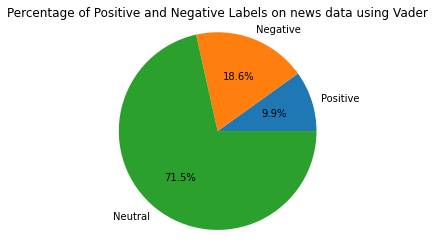

In [ ]:
# create a pie chart
fig, ax = plt.subplots()
ax.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%')
ax.axis('equal')  # equal aspect ratio ensures that the pie is drawn as a circle
ax.set_title('Percentage of Positive and Negative Labels on news data using Vader')

plt.show()
     